<a href="https://colab.research.google.com/github/Varshika-5a4/FML/blob/main/Multivariate_ridge_startup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
     

In [3]:
temp=pd.read_csv("/content/50_Startups.csv")
temp.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
temp.shape

(50, 5)

In [5]:
temp.drop_duplicates(keep="first",inplace=True)
     

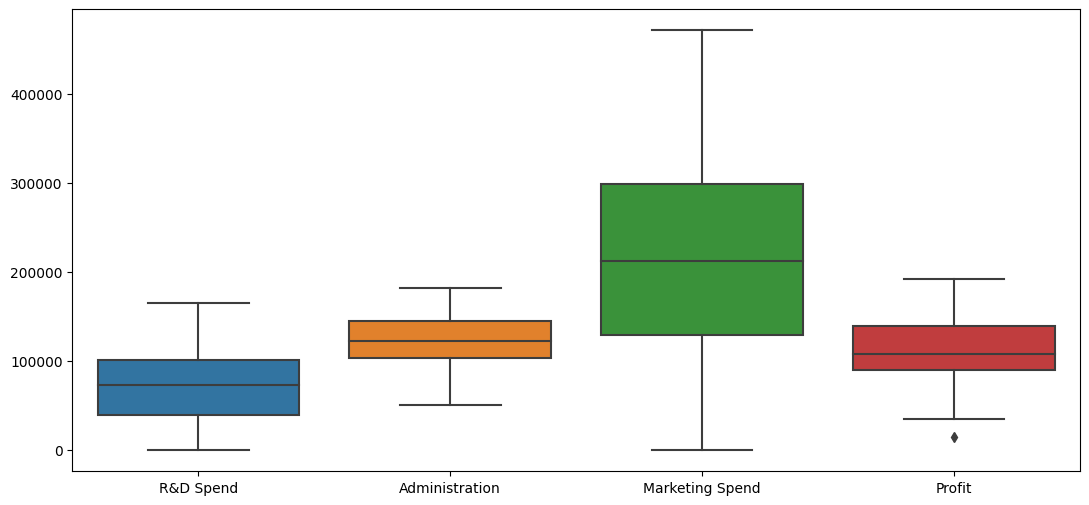

In [7]:
plt.figure(figsize=(13, 6))
sns.boxplot(data=temp)
plt.show()
     


In [8]:
q1=temp['Profit'].quantile(0.25)
q3=temp['Profit'].quantile(0.75)
iqr=q3-q1
print(iqr)

49627.07499999998


In [9]:
up = q3+iqr*1.5
down = q1-iqr*1.5
print(up, down)

214206.58999999997 15698.290000000023


In [10]:
Outlier=[]
profit=temp["Profit"]

for i in profit:
  if i>up :
    Outlier.append(i)
    print("Up Outlier",i)
  if i<down:
      Outlier.append(i)
      print("Down Outlier",i)

Down Outlier 14681.4


In [12]:
temp["Profit"]=temp["Profit"].replace(Outlier,temp["Profit"].mean())

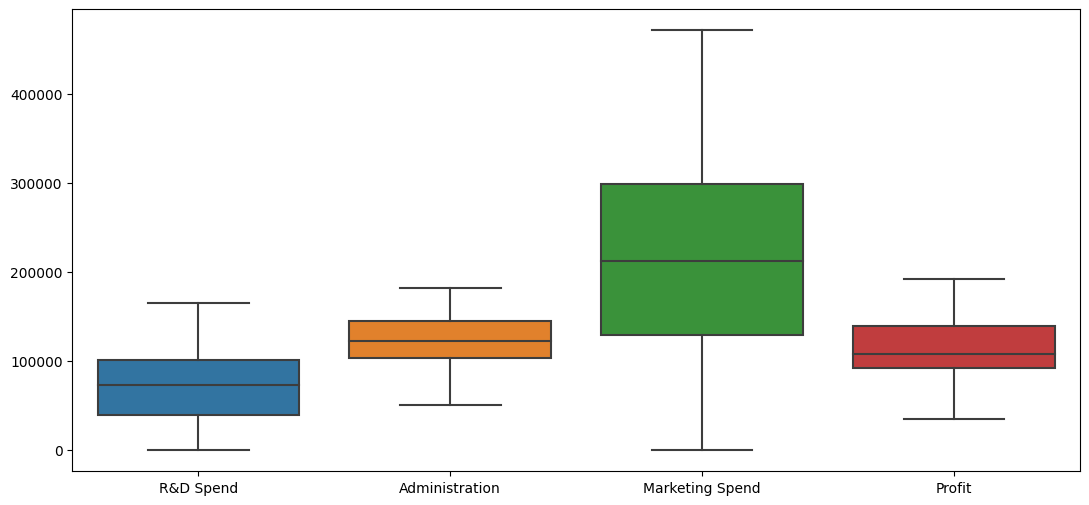

In [13]:
plt.figure(figsize=(13, 6))
sns.boxplot(data=temp)
plt.show()

<ipython-input-14-947030df315f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(temp.corr(),annot=True)


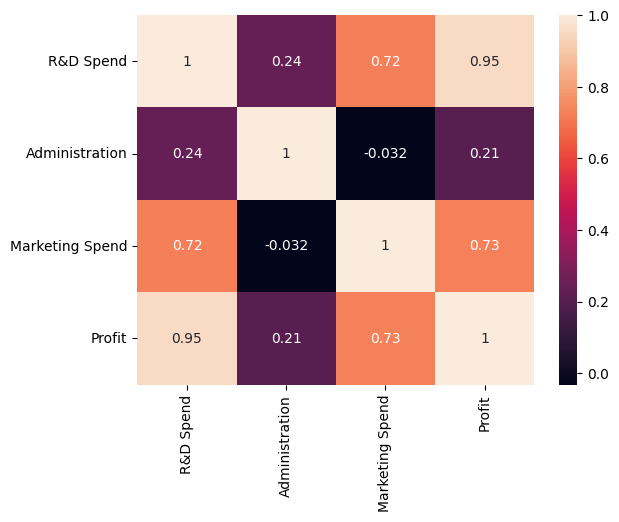

In [14]:
sns.heatmap(temp.corr(),annot=True)
plt.show()

In [15]:
X = temp['Profit'].values
y = temp['R&D Spend'].values
print(X.shape,y.shape)
X = X.reshape(-1,1)
y = y.reshape(-1,1)
print(X.shape, y.shape)

(50,) (50,)
(50, 1) (50, 1)


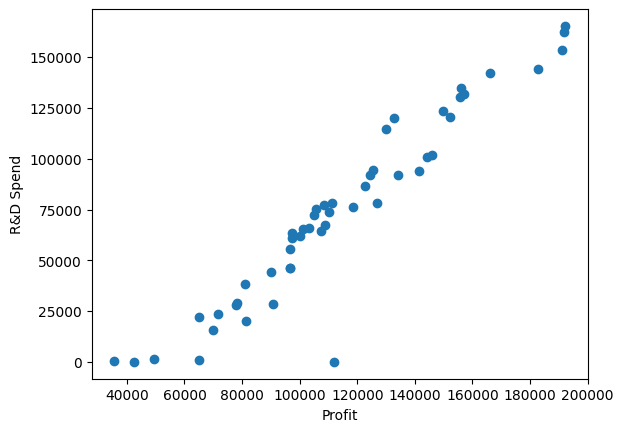

In [16]:
plt.scatter(X,y)
plt.xlabel("Profit")
plt.ylabel("R&D Spend")
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.10,random_state=42)
     


In [18]:
from sklearn.linear_model import Ridge
reg = Ridge(alpha=0.1)
reg.fit(X_train,y_train)

Ridge(alpha=0.1)

In [19]:
y_predict = reg.predict(X_train)
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
MAE = mean_absolute_error(y_train,y_predict)
MSE = mean_squared_error(y_train,y_predict)
RMSE = np.sqrt(mean_squared_error(y_train,y_predict))
R2_SCORE = r2_score(y_train,y_predict)
print("MAE :",MAE)
print("MSE :",MSE)
print("RMSE :",RMSE)
print("R2_SCORE :",R2_SCORE)

MAE : 9066.300869348204
MSE : 200064600.19379342
RMSE : 14144.41940108513
R2_SCORE : 0.9058919929607832


In [20]:
y_predict_test = reg.predict(X_test)
MAE = mean_absolute_error(y_test,y_predict_test)
MSE = mean_squared_error(y_test,y_predict_test)
RMSE = np.sqrt(mean_squared_error(y_test,y_predict_test))
R2_SCORE = r2_score(y_test,y_predict_test)
print("MAE :",MAE)
print("MSE :",MSE)
print("RMSE :",RMSE)
print("R2_SCORE :",R2_SCORE)

MAE : 7251.068513297997
MSE : 76792341.51987994
RMSE : 8763.123958947514
R2_SCORE : 0.937480642023444


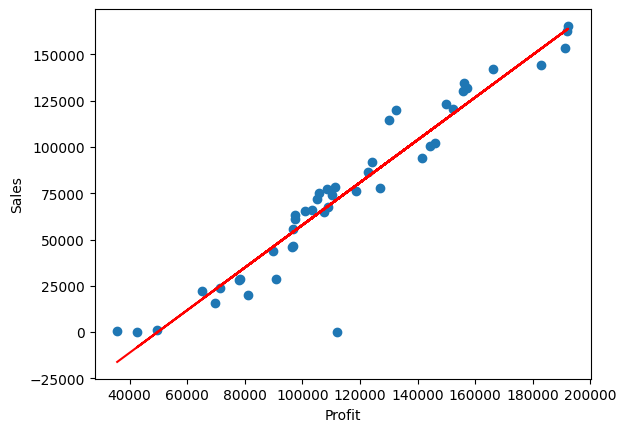

In [21]:
plt.scatter(X_train,y_train)
plt.xlabel("Profit")
plt.ylabel("Sales")
plt.plot(X_train,y_predict,color ='red')
plt.show()